In [1]:
# magic function that renders the figure in a notebook instead of
# displaying a dump of the figure object
# sets the backend of matplotlib to the 'inline' backend
# with this backend, the output of plotting commands is displayed inline
# within frontends like the Jupyter notebook, directly below the code cell
# that produced it
# the resulting plots will then also be stored in the notebook document
%matplotlib inline

In [2]:
# creating a new directory named plots
!mkdir plots

# creating a new directory named models
!mkdir models

# creating a new directory named processed_datasets
!mkdir processed_datasets

In [3]:
# importing warnings library to handle exceptions, errors, and warning of
# the program
import warnings

# ignoring potential warnings of the program
warnings.filterwarnings('ignore')

In [4]:
# mounting google drive to read files stores in it
# from google.colab import drive

# drive.mount('/content/drive')

In [5]:
!wget --no-check-certificate https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

--2021-09-06 18:42:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203415 (199K) [application/x-httpd-php]
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z 100%[===================>] 198.65K   958KB/s    in 0.2s    

2021-09-06 18:42:19 (958 KB/s) - ‘smsspamcollection.zip’ saved [203415/203415]



In [6]:
!unzip /content/smsspamcollection.zip

Archive:  /content/smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


In [7]:
!ls

models	processed_datasets  sample_data        smsspamcollection.zip
plots	readme		    SMSSpamCollection


In [8]:
# importing pandas library to perform data manipulation and analysis
import pandas as pd

pd.options.display.max_columns = None
pd.options.display.max_colwidth = 150

In [9]:
sms_spam_dataframe = pd.read_csv('/content/SMSSpamCollection',
                                 sep='\t',
                                 header=None,
                                 names=['class', 'sms_message'])
sms_spam_dataframe

,class,sms_message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"
...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-..."
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free


In [10]:
# printing the columns of the dataframe
sms_spam_dataframe.columns

Index(['class', 'sms_message'], dtype='object')

In [11]:
sms_spam_dataframe = sms_spam_dataframe[['sms_message', 'class']]
sms_spam_dataframe

,sms_message,class
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham
...,...,...
5567,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-...",spam
5568,Will ü b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other suggestions?",ham
5570,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,ham


In [12]:
# displaying the dimensionality of the dataframe
sms_spam_dataframe.shape

(5572, 2)

In [13]:
# printing a concise summary of the dataframe
# information such as index, data type, columns, non-null values,
# and memory usage
sms_spam_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sms_message  5572 non-null   object
 1   class        5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [14]:
# generating descriptive statistics of the dataframe
sms_spam_dataframe.describe()

,sms_message,class
count,5572,5572
unique,5169,2
top,"Sorry, I'll call later",ham
freq,30,4825


In [15]:
sms_spam_dataframe.groupby('class').describe().T

class                                  ham  \
sms_message count                     4825   
            unique                    4516   
            top     Sorry, I'll call later   
            freq                        30   

class                                                                                                                                                              spam  
sms_message count                                                                                                                                                   747  
            unique                                                                                                                                                  653  
            top     Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!  
            freq                                                                                                                                                      4

In [16]:
# checking for missing or null values in the dataframe
dataframe_null = sms_spam_dataframe[sms_spam_dataframe.isnull().any(axis=1)]
dataframe_null

,sms_message,class


In [17]:
# number of rows with any missing or null values in the dataframe
dataframe_null.shape[0]

0

In [18]:
# removing the missing or null values from the dataframe if exist
sms_spam_dataframe = sms_spam_dataframe[sms_spam_dataframe.notna().all(axis=1)]

# count of null values in class and sms_message columns of the dataframe
sms_spam_dataframe[['class', 'sms_message']].isnull().sum()

class          0
sms_message    0
dtype: int64

In [19]:
# importing pyplot from matplotlib library to create interactive
# visualizations
import matplotlib.pyplot as plt

In [20]:
# importing seaborn library which is built on top of matplotlib to create
# statistical graphics
import seaborn as sns

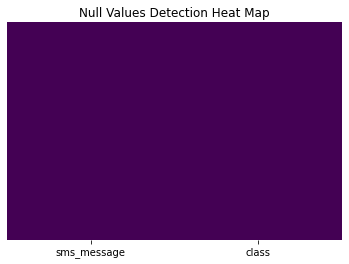

In [21]:
# plotting the heatmap for missing or null values in the dataframe before
# cleaning
sns.heatmap(sms_spam_dataframe.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')
plt.title('Null Values Detection Heat Map')
plt.savefig('plots/null_detection_heat_map.png',
            facecolor='white')
plt.show()

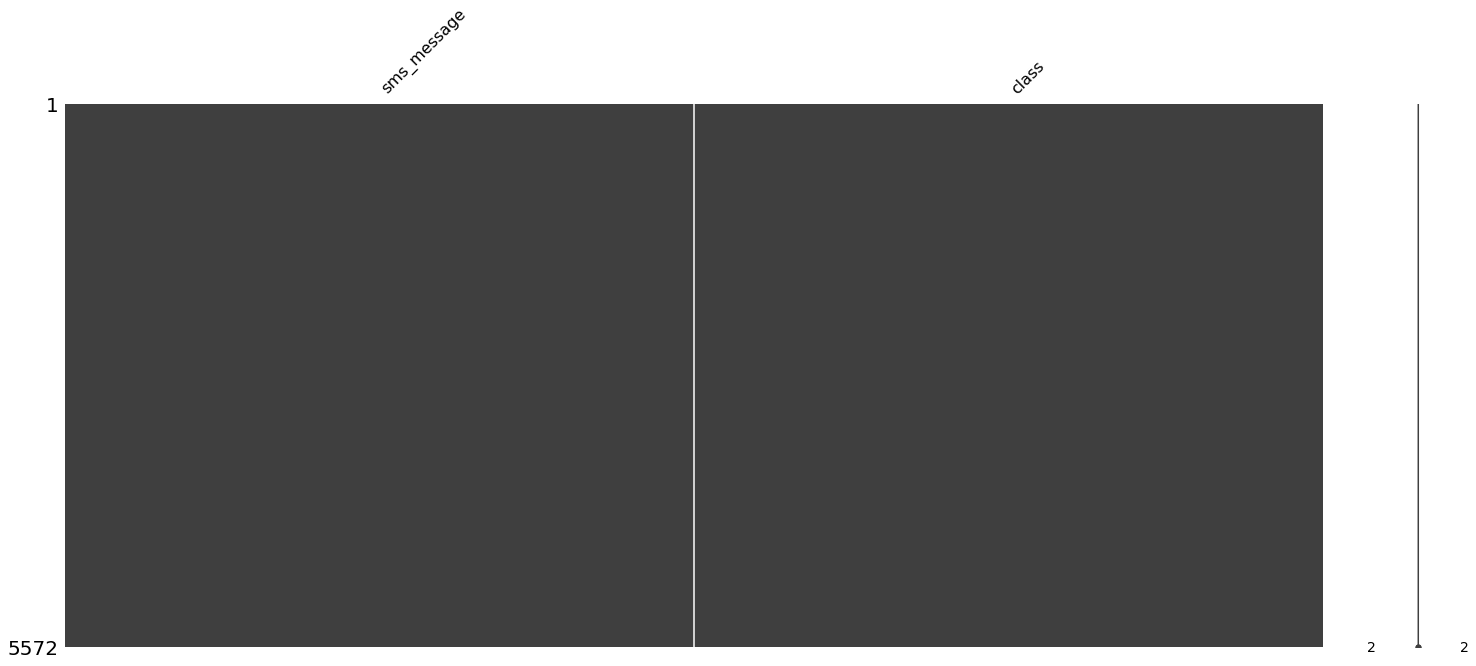

In [22]:
# importing missingno library
# used to understand the distribution of missing values through
# informative visualizations
# visualizations can be in the form of heat maps or bar charts
# used to observe where the missing values have occurred
# used to check the correlation of the columns containing the missing
# with the target column
import missingno as msno

# plotting a matrix visualization of the nullity of the dataframe
# before cleaning
fig = msno.matrix(sms_spam_dataframe)
fig_copy = fig.get_figure()
fig_copy.savefig('plots/msno_matrix.png',
                 bbox_inches='tight')
fig

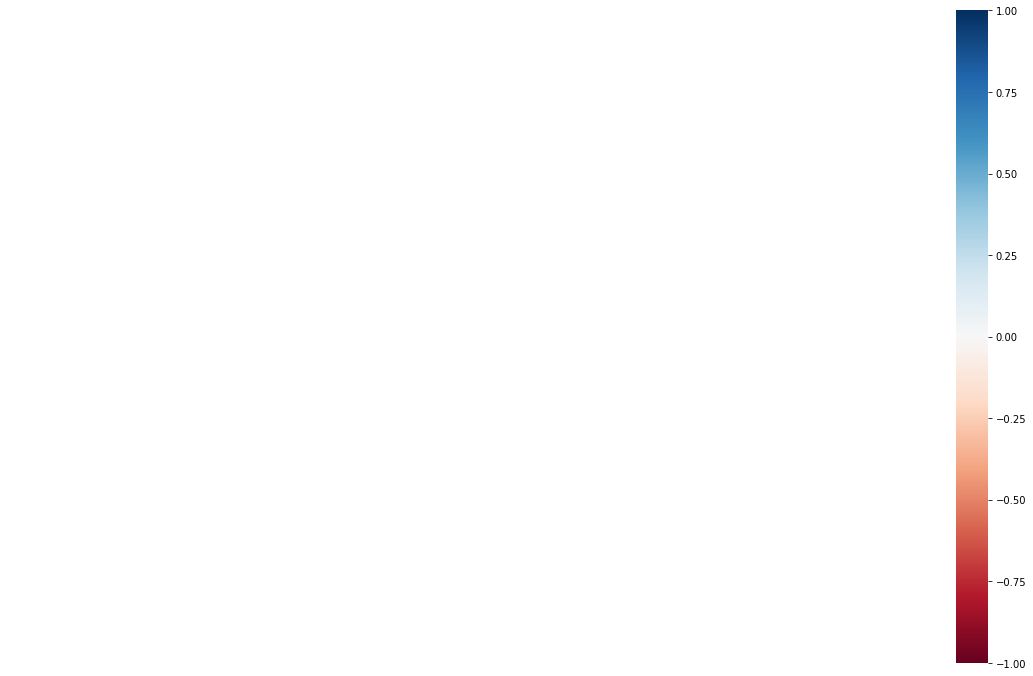

In [23]:
# plotting a seaborn heatmap visualization of nullity correlation
# in the dataframe before cleaning
fig = msno.heatmap(sms_spam_dataframe)
fig_copy = fig.get_figure()
fig_copy.savefig('plots/msno_heatmap.png',
                 bbox_inches='tight')
fig

In [24]:
duplicated_records = sms_spam_dataframe[sms_spam_dataframe.duplicated()]
duplicated_records

,sms_message,class
103,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your frie...,ham
154,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your frie...,ham
207,"As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We w...",ham
223,"Sorry, I'll call later",ham
326,No calls..messages..missed calls,ham
...,...,...
5524,You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p ...,spam
5535,"I know you are thinkin malaria. But relax, children cant handle malaria. She would have been worse and its gastroenteritis. If she takes enough to...",ham
5539,Just sleeping..and surfing,ham
5553,Hahaha..use your brain dear,ham


In [25]:
# checking the number of duplicate rows exist in the dataframe
# before cleaning
sms_spam_dataframe.duplicated().sum()

403

In [26]:
# removing the duplicate rows from the dataframe if exist
# sms_spam_dataframe = sms_spam_dataframe.drop_duplicates()

In [27]:
# checking the number of duplicate rows exist in the dataframe
# after cleaning
# sms_spam_dataframe.duplicated().sum()

In [28]:
# saving cleaned dataset to a csv file
file_name = 'processed_datasets/cleaned_dataset.csv'
sms_spam_dataframe.to_csv(file_name,
                          encoding='utf-8',
                          index=False)

# loading dataset from the saved csv file to a pandas dataframe
sms_spam_dataframe = pd.read_csv(file_name)

# printing the cleaned loaded dataframe
sms_spam_dataframe

,sms_message,class
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham
...,...,...
5567,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-...",spam
5568,Will ü b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other suggestions?",ham
5570,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,ham


In [29]:
# displaying the first 5 rows of the dataframe
sms_spam_dataframe.head()

,sms_message,class
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham


In [30]:
# displaying the last 5 rows of the dataframe
sms_spam_dataframe.tail()

,sms_message,class
5567,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-...",spam
5568,Will ü b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other suggestions?",ham
5570,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,ham
5571,Rofl. Its true to its name,ham


In [31]:
# importing set of stopwords from wordcloud library
from wordcloud import STOPWORDS

stopwords = set(STOPWORDS)

# printing number of stopwords defined in wordcloud library
len(stopwords)

190

In [32]:
# importing WordCloud object for generating and drawing
# wordclouds from wordcloud library
from wordcloud import WordCloud

In [33]:
# function to return the wordcloud for a given text
def plot_wordcloud(text):
    wordcloud = WordCloud(width=600,
                          height=300,
                          background_color='black',
                          stopwords=stopwords,
                          max_font_size=50,
                          colormap='Oranges').generate(text)
    return wordcloud

In [34]:
sms_spam_dataframe['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [35]:
ham_dataframe = sms_spam_dataframe[sms_spam_dataframe['class'] == 'ham']
ham_dataframe

,sms_message,class
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham
6,Even my brother is not like to speak with me. They treat me like aids patent.,ham
...,...,...
5565,Huh y lei...,ham
5568,Will ü b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other suggestions?",ham
5570,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,ham


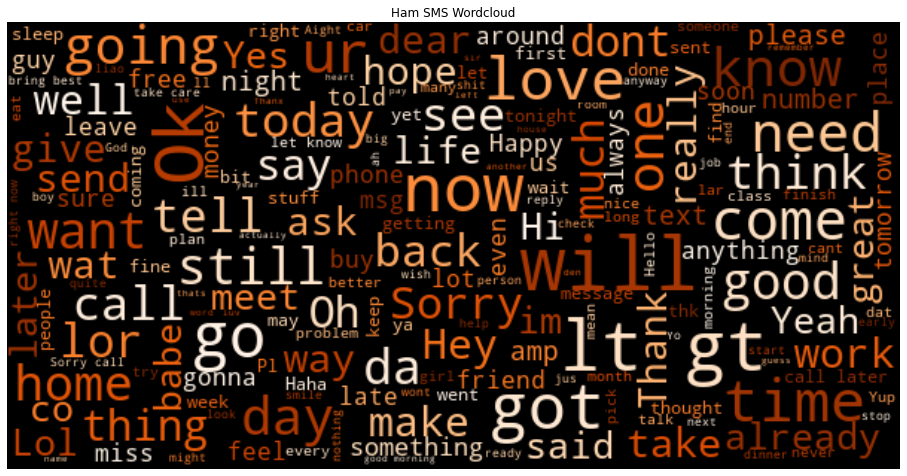

In [36]:
# create numpy list to visualize using wordcloud
ham_sms_message_text = ' '.join(ham_dataframe['sms_message'].to_numpy().tolist())

# generate wordcloud for ham sms messages
ham_sms_wordcloud = plot_wordcloud(ham_sms_message_text)
plt.figure(figsize=(16, 10))
plt.imshow(ham_sms_wordcloud,
           interpolation='bilinear')
plt.axis('off')
plt.title('Ham SMS Wordcloud')
plt.savefig('plots/ham_wordcloud.png',
            facecolor='white')
plt.show()

In [37]:
spam_dataframe = sms_spam_dataframe[sms_spam_dataframe['class'] == 'spam']
spam_dataframe

,sms_message,class
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,spam
5,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",spam
8,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 ...,spam
9,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 080...,spam
11,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info",spam
...,...,...
5537,Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX,spam
5540,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A SHIT. BAILIFF DUE IN DAYS. I O £250...,spam
5547,"Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove...",spam
5566,"REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode",spam


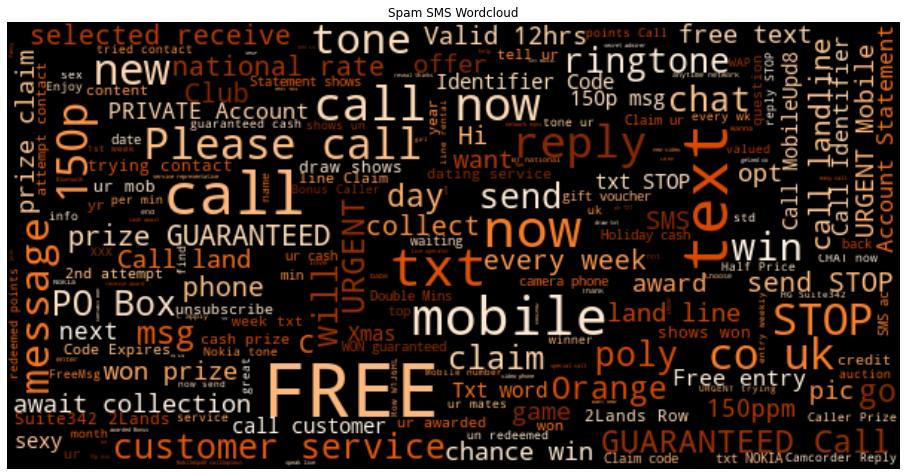

In [38]:
# create numpy list to visualize using wordcloud
spam_sms_message_text = ' '.join(spam_dataframe['sms_message'].to_numpy().tolist())

# generate wordcloud for spam sms messages
spam_sms_wordcloud = plot_wordcloud(spam_sms_message_text)
plt.figure(figsize=(16, 10))
plt.imshow(spam_sms_wordcloud,
           interpolation='bilinear')
plt.axis('off')
plt.title('Spam SMS Wordcloud')
plt.savefig('plots/spam_wordcloud.png',
            facecolor='white')
plt.show()

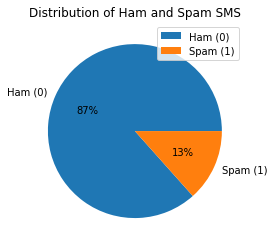

In [39]:
# plotting the distribution of target values
fig = plt.figure()
lbl = ['Ham (0)', 'Spam (1)']
pct = '%1.0f%%'
ax = sms_spam_dataframe['class'].value_counts().plot(kind='pie',
                                                     labels=lbl,
                                                     autopct=pct)
ax.yaxis.set_visible(False)
plt.title('Distribution of Ham and Spam SMS')
plt.legend()
fig.savefig('plots/ham_spam_pie_chart.png',
            facecolor='white')
plt.show()

In [40]:
# downsampling is a process where you randomly delete some of the
# observations from the majority class so that the numbers in majority
# and minority classes are matched. Below, we have downsampled the ham
# messages (majority class)
# there are now 747 messages in each class
downsampled_ham_dataframe = ham_dataframe.sample(n=len(spam_dataframe),
                                                 random_state=44)
downsampled_ham_dataframe

,sms_message,class
3234,Height of recycling: Read twice- People spend time for earning money and the same money is spent for spending time!;-) Good morning.. keep smiling:-),ham
3804,Yup song bro. No creative. Neva test quality. He said check review online.,ham
2701,"Feb &lt;#&gt; is ""I LOVE U"" day. Send dis to all ur ""VALUED FRNDS"" evn me. If 3 comes back u'll gt married d person u luv! If u ignore dis u wil...",ham
2820,Don't forget who owns you and who's private property you are ... And be my good boy always .. *passionate kiss*,ham
5161,Lol no. I just need to cash in my nitros. Hurry come on before I crash out!,ham
...,...,...
4346,Enjoy urself tmr...,ham
1008,I don't quite know what to do. I still can't get hold of anyone. I cud pick you up bout 7.30pm and we can see if they're in the pub?,ham
97,i see. When we finish we have loads of loans to pay,ham
2099,"No dice, art class 6 thru 9 :( thanks though. Any idea what time I should come tomorrow?",ham


In [41]:
print('Ham dataframe shape:', downsampled_ham_dataframe.shape)
print('Spam dataframe shape:', spam_dataframe.shape)

Ham dataframe shape: (747, 2)
Spam dataframe shape: (747, 2)


In [42]:
# mergin the two dataframes (spam + downsampled ham dataframes)
merged_dataframe = pd.concat([downsampled_ham_dataframe, spam_dataframe])
merged_dataframe = merged_dataframe.reset_index(drop=True)
merged_dataframe 

,sms_message,class
0,Height of recycling: Read twice- People spend time for earning money and the same money is spent for spending time!;-) Good morning.. keep smiling:-),ham
1,Yup song bro. No creative. Neva test quality. He said check review online.,ham
2,"Feb &lt;#&gt; is ""I LOVE U"" day. Send dis to all ur ""VALUED FRNDS"" evn me. If 3 comes back u'll gt married d person u luv! If u ignore dis u wil...",ham
3,Don't forget who owns you and who's private property you are ... And be my good boy always .. *passionate kiss*,ham
4,Lol no. I just need to cash in my nitros. Hurry come on before I crash out!,ham
...,...,...
1489,Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX,spam
1490,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A SHIT. BAILIFF DUE IN DAYS. I O £250...,spam
1491,"Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove...",spam
1492,"REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode",spam


In [43]:
merged_dataframe['class'].value_counts()

spam    747
ham     747
Name: class, dtype: int64

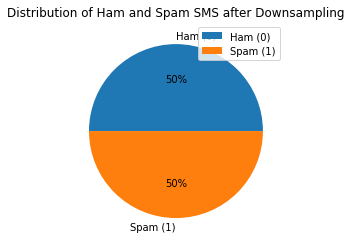

In [44]:
# plotting the distribution of target values after downsampling
fig = plt.figure()
lbl = ['Ham (0)', 'Spam (1)']
pct = '%1.0f%%'
ax = merged_dataframe['class'].value_counts().plot(kind='pie',
                                                   labels=lbl,
                                                   autopct=pct)
ax.yaxis.set_visible(False)
plt.title('Distribution of Ham and Spam SMS after Downsampling')
plt.legend()
fig.savefig('plots/ham_spam_pie_chart_after_downsampling.png',
            facecolor='white')
plt.show()

In [45]:
merged_dataframe['label'] = merged_dataframe['class'].map({'ham': 0, 'spam': 1})
merged_dataframe

,sms_message,class,label
0,Height of recycling: Read twice- People spend time for earning money and the same money is spent for spending time!;-) Good morning.. keep smiling:-),ham,0
1,Yup song bro. No creative. Neva test quality. He said check review online.,ham,0
2,"Feb &lt;#&gt; is ""I LOVE U"" day. Send dis to all ur ""VALUED FRNDS"" evn me. If 3 comes back u'll gt married d person u luv! If u ignore dis u wil...",ham,0
3,Don't forget who owns you and who's private property you are ... And be my good boy always .. *passionate kiss*,ham,0
4,Lol no. I just need to cash in my nitros. Hurry come on before I crash out!,ham,0
...,...,...,...
1489,Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX,spam,1
1490,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A SHIT. BAILIFF DUE IN DAYS. I O £250...,spam,1
1491,"Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove...",spam,1
1492,"REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode",spam,1


In [46]:
merged_dataframe['length'] = merged_dataframe['sms_message'].apply(len)
merged_dataframe

,sms_message,class,label,length
0,Height of recycling: Read twice- People spend time for earning money and the same money is spent for spending time!;-) Good morning.. keep smiling:-),ham,0,149
1,Yup song bro. No creative. Neva test quality. He said check review online.,ham,0,74
2,"Feb &lt;#&gt; is ""I LOVE U"" day. Send dis to all ur ""VALUED FRNDS"" evn me. If 3 comes back u'll gt married d person u luv! If u ignore dis u wil...",ham,0,165
3,Don't forget who owns you and who's private property you are ... And be my good boy always .. *passionate kiss*,ham,0,111
4,Lol no. I just need to cash in my nitros. Hurry come on before I crash out!,ham,0,75
...,...,...,...,...
1489,Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX,spam,1,90
1490,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A SHIT. BAILIFF DUE IN DAYS. I O £250...,spam,1,158
1491,"Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove...",spam,1,160
1492,"REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode",spam,1,147


In [47]:
# printing a concise summary of the dataframe
# information such as index, data type, columns, non-null values,
# and memory usage
merged_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sms_message  1494 non-null   object
 1   class        1494 non-null   object
 2   label        1494 non-null   int64 
 3   length       1494 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.8+ KB


In [48]:
# generating descriptive statistics of the dataframe
merged_dataframe.describe().round(2)

,label,length
count,1494.0,1494.00
mean,0.5,105.95
std,0.5,59.34
min,0.0,4.00
25%,0.0,50.00
50%,0.5,120.00
75%,1.0,153.00
max,1.0,910.00


In [49]:
# calculate length statistics by label types
merged_dataframe.groupby('class')['length'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
ham,747.0,73.24,63.79,4.0,33.0,53.0,95.0,910.0
spam,747.0,138.67,28.87,13.0,133.0,149.0,157.0,223.0


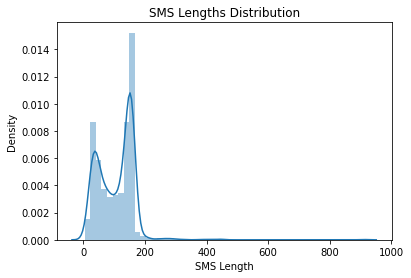

In [50]:
# plot a univariate distribution of observations for sms lengths
sns.distplot(merged_dataframe['length'].values)
plt.title('SMS Lengths Distribution')
plt.xlabel('SMS Length')
plt.savefig('plots/sms_length.png',
            facecolor='white')
plt.show()

In [51]:
# saving merged dataset to a csv file
file_name = 'processed_datasets/merged_dataset.csv'
merged_dataframe.to_csv(file_name,
                        encoding='utf-8',
                        index=False)

# loading dataset from the saved csv file to a pandas dataframe
merged_dataframe = pd.read_csv(file_name)

# printing the cleaned loaded dataframe
merged_dataframe

,sms_message,class,label,length
0,Height of recycling: Read twice- People spend time for earning money and the same money is spent for spending time!;-) Good morning.. keep smiling:-),ham,0,149
1,Yup song bro. No creative. Neva test quality. He said check review online.,ham,0,74
2,"Feb &lt;#&gt; is ""I LOVE U"" day. Send dis to all ur ""VALUED FRNDS"" evn me. If 3 comes back u'll gt married d person u luv! If u ignore dis u wil...",ham,0,165
3,Don't forget who owns you and who's private property you are ... And be my good boy always .. *passionate kiss*,ham,0,111
4,Lol no. I just need to cash in my nitros. Hurry come on before I crash out!,ham,0,75
...,...,...,...,...
1489,Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min Gsex POBOX 2667 WC1N 3XX,spam,1,90
1490,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE MINS. INDIA CUST SERVs SED YES. L8ER GOT MEGA BILL. 3 DONT GIV A SHIT. BAILIFF DUE IN DAYS. I O £250...,spam,1,158
1491,"Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove...",spam,1,160
1492,"REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode",spam,1,147


In [52]:
X = merged_dataframe['sms_message']
X

0       Height of recycling: Read twice- People spend time for earning money and the same money is spent for spending time!;-) Good morning.. keep smiling:-)
1                                                                                  Yup song bro. No creative. Neva test quality. He said check review online.
2       Feb  &lt;#&gt;  is "I LOVE U" day. Send dis to all ur "VALUED FRNDS" evn me. If 3 comes back u'll gt married d person u luv! If u ignore dis u wil...
3                                             Don't forget who owns you and who's private property you are ... And be my good boy always .. *passionate kiss*
4                                                                                 Lol no. I just need to cash in my nitros. Hurry come on before I crash out!
                                                                                ...                                                                          
1489                                                

In [53]:
y = merged_dataframe['label'].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [54]:
# importing train_test_split from scikit-learn library
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=443)

In [56]:
X_train

756     07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 0800093...
1138    YOUR CHANCE TO BE ON A REALITY FANTASY SHOW call now = 08707509020 Just 20p per min NTT Ltd, PO Box 1327 Croydon CR9 5WB 0870 is a national = rate...
1002    Todays Voda numbers ending 1225 are selected to receive a £50award. If you have a match please call 08712300220 quoting claim code 3100 standard r...
1448    Our records indicate u maybe entitled to 5000 pounds in compensation for the Accident you had. To claim 4 free reply with CLAIM to this msg. 2 sto...
544                                                                                                                   There bold 2  &lt;#&gt; . Is that yours
                                                                                ...                                                                          
479                                                 

In [57]:
X_train.shape

(1195,)

In [58]:
y_train

array([1, 1, 1, ..., 1, 0, 1])

In [59]:
y_train.shape

(1195,)

In [60]:
X_test

1388               Thanks 4 your continued support Your question this week will enter u in2 our draw 4 £100 cash. Name the NEW US President? txt ans to 80082
1492      REMINDER FROM O2: To get 2.50 pounds free call credit and details of great offers pls reply 2 this text with your valid name, house no and postcode
1179    URGENT! We are trying to contact U. Todays draw shows that you have won a £2000 prize GUARANTEED. Call 09066358361 from land line. Claim Y87. Vali...
1464    u r subscribed 2 TEXTCOMP 250 wkly comp. 1st wk?s free question follows, subsequent wks charged@150p/msg.2 unsubscribe txt STOP 2 84128,custcare 0...
64                                                                                                                           on hen night. Going with a swing
                                                                                ...                                                                          
807                                                F

In [61]:
X_test.shape

(299,)

In [62]:
y_test

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0])

In [63]:
y_test.shape

(299,)

In [64]:
# importing tensorflow library
# it is a free and open-source software library for machine learning
# used across a range of machine learning related tasks
# focus on training and inference of deep neural networks
import tensorflow as tf

In [65]:
# importing Tokenizer from keras library
# keras is a high-level api of tensorflow
# keras.preprocessing.text provides keras data preprocessing utils
# to pre-process datasets with textual data before they are fed to the
# machine learning model
from tensorflow.keras.preprocessing.text import Tokenizer

In [66]:
# defining pre-processing hyperparameters

# out of vocabulary token
oov_token = '<OOV>'

vocabulary_size = 500

In [67]:
# Tokenizer allows to vectorize a text corpus, by turning each text into
# either a sequence of integers (each integer being the index of a token
# in a dictionary) or into a vector where the coefficient for each token
# could be binary, based on word count, based on tf-idf

# hyper-parameters used in Tokenizer object are: num_words and oov_token
# num_words: indicate how many unique word you want to load in training
# and testing data
# oov_token: out of vocabulary token will be added to word index in the
# corpus which is used to build the model. This is used to replace out of
# vocabulary words (words that are not in our corpus) during
# text_to_sequence calls.

tokenizer = Tokenizer(num_words=vocabulary_size,
                      char_level=False,
                      oov_token=oov_token)

# updates internal vocabulary based on a list of texts
# required before using texts_to_sequences
tokenizer.fit_on_texts(X_train)

In [68]:
# get the word_index
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'u': 8,
 'your': 9,
 'for': 10,
 'is': 11,
 'now': 12,
 '2': 13,
 'and': 14,
 'or': 15,
 'in': 16,
 'free': 17,
 'on': 18,
 'have': 19,
 'ur': 20,
 '4': 21,
 'txt': 22,
 'with': 23,
 'from': 24,
 'of': 25,
 'are': 26,
 'it': 27,
 'me': 28,
 'text': 29,
 'my': 30,
 'get': 31,
 'this': 32,
 'mobile': 33,
 'stop': 34,
 'no': 35,
 'just': 36,
 'will': 37,
 'be': 38,
 'reply': 39,
 'we': 40,
 'can': 41,
 'claim': 42,
 'that': 43,
 'www': 44,
 'if': 45,
 'so': 46,
 'only': 47,
 'our': 48,
 'send': 49,
 'prize': 50,
 'at': 51,
 'out': 52,
 'not': 53,
 'do': 54,
 'cash': 55,
 't': 56,
 'new': 57,
 'please': 58,
 '150p': 59,
 'go': 60,
 'won': 61,
 '1': 62,
 'but': 63,
 'up': 64,
 'uk': 65,
 'when': 66,
 'urgent': 67,
 'nokia': 68,
 'what': 69,
 'tone': 70,
 'week': 71,
 'all': 72,
 "i'm": 73,
 'com': 74,
 'know': 75,
 'win': 76,
 'love': 77,
 '50': 78,
 'contact': 79,
 'who': 80,
 'phone': 81,
 'time': 82,
 'msg': 83,


In [69]:
len(word_index)

4168

In [70]:
# defining pre-processing hyperparameters

# idicates the maximum number of words considered in a text
maximum_length = 50

# remove values from sequences larger than maxlen, either at the
# beginning ('pre') or at the end ('post') of the sequences
truncating_type = 'post'

# pad either before ('pre') or after ('post') each sequence
padding_type = 'post'

In [71]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [72]:
# importing numpy library
# used to perform fast mathematical operations over python arrays
# and lists
import numpy as np

In [73]:
# transforms each text in train data to a sequence of integers
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_sequences[0]

[1,
 1,
 1,
 83,
 40,
 267,
 2,
 6,
 3,
 417,
 9,
 39,
 2,
 48,
 127,
 10,
 4,
 17,
 68,
 33,
 17,
 315,
 58,
 6,
 12,
 291,
 10,
 217,
 159]

In [74]:
# lengths of each generated sequences of integers in train data
x_train_length_of_sequence = [len(sequence) for sequence in X_train_sequences]
x_train_length_of_sequence[0]

29

In [75]:
# maximum length of a sequence in the train data
np.max(x_train_length_of_sequence)

189

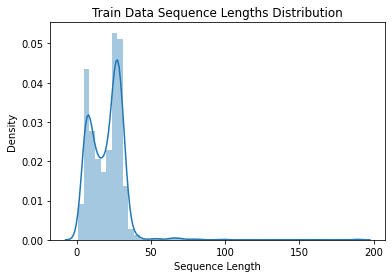

In [76]:
# plot a univariate distribution of observations for sequence lengths
# of train data
sns.distplot(x_train_length_of_sequence)
plt.title('Train Data Sequence Lengths Distribution')
plt.xlabel('Sequence Length')
plt.savefig('plots/train_sequence_length.png',
            facecolor='white')
plt.show()

In [77]:
# transforms each text in test data to a sequence of integers
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_sequences[0]

[208,
 21,
 9,
 1,
 1,
 9,
 1,
 32,
 71,
 37,
 1,
 8,
 1,
 48,
 130,
 21,
 227,
 55,
 243,
 7,
 57,
 203,
 1,
 22,
 1,
 2,
 1]

In [78]:
# lengths of each generated sequences of integers in test data
x_test_length_of_sequence = [len(sequence) for sequence in X_test_sequences]
x_test_length_of_sequence[0]

27

In [79]:
# maximum length of a sequence in the test data
np.max(x_test_length_of_sequence)

48

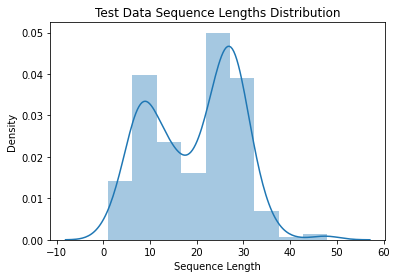

In [80]:
# plot a univariate distribution of observations for sequence lengths
# of test data
sns.distplot(x_test_length_of_sequence)
plt.title('Test Data Sequence Lengths Distribution')
plt.xlabel('Sequence Length')
plt.savefig('plots/test_sequence_length.png',
            facecolor='white')
plt.show()

In [81]:
# padding on train data
X_train_padded = pad_sequences(X_train_sequences,
                               maxlen=maximum_length,
                               padding=padding_type,
                               truncating=truncating_type)
X_train_padded[0]

array([  1,   1,   1,  83,  40, 267,   2,   6,   3, 417,   9,  39,   2,
        48, 127,  10,   4,  17,  68,  33,  17, 315,  58,   6,  12, 291,
        10, 217, 159,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [82]:
# lengths of each padded sequences of integers in train data
x_train_length_of_padded_sequence = [len(sequence) for sequence in X_train_padded]
x_train_length_of_padded_sequence[0]

50

In [83]:
# maximum length of a padded sequence in the train data
np.max(x_train_length_of_padded_sequence)

50

In [84]:
X_train_padded.shape

(1195, 50)

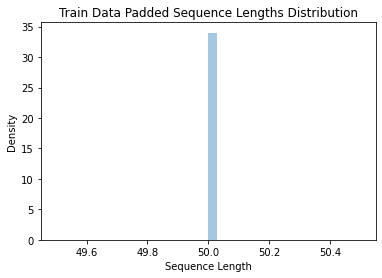

In [85]:
# plot a univariate distribution of observations for sequence lengths
# of train data after padding
sns.distplot(x_train_length_of_padded_sequence)
plt.title('Train Data Padded Sequence Lengths Distribution')
plt.xlabel('Sequence Length')
plt.savefig('plots/train_padded_sequence_length.png',
            facecolor='white')
plt.show()

In [86]:
# padding on test data
X_test_padded = pad_sequences(X_test_sequences,
                              maxlen=maximum_length,
                              padding=padding_type,
                              truncating=truncating_type)
X_test_padded[0]

array([208,  21,   9,   1,   1,   9,   1,  32,  71,  37,   1,   8,   1,
        48, 130,  21, 227,  55, 243,   7,  57, 203,   1,  22,   1,   2,
         1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [87]:
# lengths of each padded sequences of integers in test data
x_test_length_of_padded_sequence = [len(sequence) for sequence in X_test_padded]
x_test_length_of_padded_sequence[0]

50

In [88]:
# maximum length of a padded sequence in the test data
np.max(x_test_length_of_padded_sequence)

50

In [89]:
X_test_padded.shape

(299, 50)

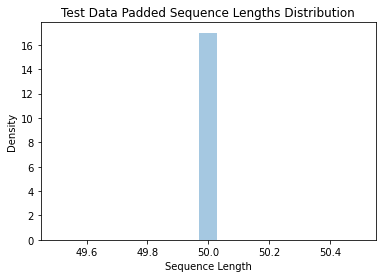

In [90]:
# plot a univariate distribution of observations for sequence lengths
# of test data after padding
sns.distplot(x_test_length_of_padded_sequence)
plt.title('Test Data Padded Sequence Lengths Distribution')
plt.xlabel('Sequence Length')
plt.savefig('plots/test_padded_sequence_length.png',
            facecolor='white')
plt.show()

In [91]:
# LSTM network arcitecture hyperparameters

# SpatialDropout1D is used to dropout the embedding layer
# The SpatialDropout1D helps to drop entire 1D feature maps instead of
# individual elements.
dropout_rate = 0.2

# n_lstm is the number of nodes in the hidden layers within the LSTM cell
no_of_nodes = 20

# return_sequences=True ensures that the LSTM cell returns all of the
# outputs from the unrolled LSTM cell through time. If this argument is
# not used, the LSTM cell will simply provide the output of the LSTM cell
# from the previous step.

# 
embedding_dimension = 16

# 
no_of_epochs = 30

# 
vocabulary_size = 500

In [92]:
# 
from tensorflow.keras.models import Sequential

# 
from tensorflow.keras.layers import Embedding

# 
from tensorflow.keras.layers import LSTM

# 
from tensorflow.keras.layers import Dense

In [93]:
# LSTM model architecture

lstm_model = Sequential()

lstm_model.add(Embedding(vocabulary_size,
                         embedding_dimension,
                         input_length=maximum_length))

lstm_model.add(LSTM(no_of_nodes,
                    dropout=dropout_rate,
                    return_sequences=True))

lstm_model.add(LSTM(no_of_nodes,
                    dropout=dropout_rate,
                    return_sequences=True))

lstm_model.add(Dense(1,
                     activation='sigmoid'))

In [94]:
lstm_model.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

In [95]:
# printing a string summary of the network
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 16)            8000      
_________________________________________________________________
lstm (LSTM)                  (None, 50, 20)            2960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 20)            3280      
_________________________________________________________________
dense (Dense)                (None, 50, 1)             21        
Total params: 14,261
Trainable params: 14,261
Non-trainable params: 0
_________________________________________________________________


In [96]:
# 
from tensorflow.keras.callbacks import EarlyStopping

In [97]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5)

history = lstm_model.fit(X_train_padded,
                         y_train,
                         epochs=no_of_epochs,
                         validation_data=(X_test_padded, y_test),
                         callbacks=[early_stopping],
                         verbose=2)

Epoch 1/30
38/38 - 6s - loss: 0.6467 - accuracy: 0.6404 - val_loss: 0.5300 - val_accuracy: 0.7210
Epoch 2/30
38/38 - 2s - loss: 0.3690 - accuracy: 0.8683 - val_loss: 0.3287 - val_accuracy: 0.8865
Epoch 3/30
38/38 - 2s - loss: 0.2749 - accuracy: 0.9137 - val_loss: 0.2737 - val_accuracy: 0.9229
Epoch 4/30
38/38 - 2s - loss: 0.2269 - accuracy: 0.9333 - val_loss: 0.2801 - val_accuracy: 0.9102
Epoch 5/30
38/38 - 2s - loss: 0.1904 - accuracy: 0.9461 - val_loss: 0.2651 - val_accuracy: 0.9229
Epoch 6/30
38/38 - 2s - loss: 0.1800 - accuracy: 0.9446 - val_loss: 0.2604 - val_accuracy: 0.9193
Epoch 7/30
38/38 - 1s - loss: 0.1595 - accuracy: 0.9520 - val_loss: 0.2424 - val_accuracy: 0.9212
Epoch 8/30
38/38 - 1s - loss: 0.1471 - accuracy: 0.9547 - val_loss: 0.2403 - val_accuracy: 0.9223
Epoch 9/30
38/38 - 2s - loss: 0.1353 - accuracy: 0.9581 - val_loss: 0.2602 - val_accuracy: 0.9235
Epoch 10/30
38/38 - 1s - loss: 0.1234 - accuracy: 0.9589 - val_loss: 0.2520 - val_accuracy: 0.9267
Epoch 11/30
38/38 -

In [98]:
lstm_path = 'models/lstm_model.h5'
lstm_model.save(lstm_path)

In [99]:
from tensorflow.keras.models import load_model

loaded_lstm_model = load_model(lstm_path)

In [100]:
loaded_lstm_model.evaluate(X_test_padded,
                           y_test)

10/10 [==============================] - 1s 9ms/step - loss: 0.2745 - accuracy: 0.9255


[0.27445176243782043, 0.9254849553108215]

In [101]:
def preprocess_text(sms_messages):
    sequence_ = tokenizer.texts_to_sequences(sms_messages)
    padded_sequence = pad_sequences(sequence_,
                                    maxlen=maximum_length,
                                    padding=padding_type,
                                    truncating=truncating_type)
    return padded_sequence

In [102]:
sms_messages = ['IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.',
                'Hello, Janith! Did you go to the school yesterday? If you did, can you please send me the notes of all the subjects?',
                'Congratulations ur awarded 500 of CD vouchers or 125 gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066.',
                'A loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.abc.co.uk to opt out reply stop',
                'If he started searching, he will get job in few days. He has great potential and talent.',
                'One chance ONLY! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for FREEE! Call The Mobile Update Co FREE on 08002986906.',
                'Valentines Day Special! Win over 1000 USD in cash in our quiz and take your partner on the trip of a lifetime! Send GO to 83600 now. 150 p/msg rcvd.',
                'Now I am better. Made up for Friday and stuffed myself like a pig yesterday. Now I feel bad.',
                'I got another job! The one at the hospital, doing data analysis or something, starts on Monday! Not sure when my thesis will finish.']

In [103]:
padded_sequences = preprocess_text(sms_messages)

for index, sms_message in enumerate(sms_messages):
  prediction = loaded_lstm_model.predict(padded_sequences)[index][0][0]
  if prediction > 0.5:
    print('SPAM - ', prediction, '-', sms_message)
  else:
    print('HAM  - ', prediction, '-', sms_message)

SPAM -  0.60779035 - IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.
HAM  -  0.4686657 - Hello, Janith! Did you go to the school yesterday? If you did, can you please send me the notes of all the subjects?
SPAM -  0.7050032 - Congratulations ur awarded 500 of CD vouchers or 125 gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066.
HAM  -  0.49190453 - A loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.abc.co.uk to opt out reply stop
HAM  -  0.39769155 - If he started searching, he will get job in few days. He has great potential and talent.
HAM  -  0.4544438 - One chance ONLY! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for FREEE! Call The Mobile Update Co FREE on 08002986906.
HAM  -  0.48983943 - Valentines Day Special! Win over 1000 USD in cash in our quiz and take your partner

In [104]:
# Densely Connected CNN (DenseNet) arcitecture hyperparameters

# 
dropout_rate = 0.2

# 
embedding_dimension = 16

# 
no_of_epochs = 30

# 
vocabulary_size = 500

In [105]:
# 
from tensorflow.keras.models import Sequential

# 
from tensorflow.keras.layers import Embedding

# 
from tensorflow.keras.layers import GlobalAveragePooling1D

# 
from tensorflow.keras.layers import Dropout

# 
from tensorflow.keras.layers import Dense

In [106]:
# Densely Connected CNN (DenseNet) model architecture

densenet_cnn_model = Sequential()

densenet_cnn_model.add(Embedding(vocabulary_size,
                                 embedding_dimension,
                                 input_length=maximum_length))

densenet_cnn_model.add(GlobalAveragePooling1D())

densenet_cnn_model.add(Dense(24,
                             activation='relu'))

densenet_cnn_model.add(Dropout(dropout_rate))

densenet_cnn_model.add(Dense(1,
                             activation='sigmoid'))

In [107]:
densenet_cnn_model.compile(loss='binary_crossentropy',
                           optimizer='adam',
                           metrics=['accuracy'])

In [108]:
# printing a string summary of the network
densenet_cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 16)            8000      
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
_________________________________________________________________


In [109]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5)

history = densenet_cnn_model.fit(X_train_padded,
                                 y_train,
                                 epochs=no_of_epochs,
                                 validation_data=(X_test_padded, y_test),
                                 callbacks=[early_stopping],
                                 verbose=2)

Epoch 1/30
38/38 - 1s - loss: 0.6891 - accuracy: 0.6343 - val_loss: 0.6814 - val_accuracy: 0.8495
Epoch 2/30
38/38 - 0s - loss: 0.6685 - accuracy: 0.8762 - val_loss: 0.6512 - val_accuracy: 0.8629
Epoch 3/30
38/38 - 0s - loss: 0.6212 - accuracy: 0.8803 - val_loss: 0.5903 - val_accuracy: 0.8662
Epoch 4/30
38/38 - 0s - loss: 0.5397 - accuracy: 0.8937 - val_loss: 0.5017 - val_accuracy: 0.8729
Epoch 5/30
38/38 - 0s - loss: 0.4448 - accuracy: 0.9004 - val_loss: 0.4119 - val_accuracy: 0.8896
Epoch 6/30
38/38 - 0s - loss: 0.3639 - accuracy: 0.9071 - val_loss: 0.3420 - val_accuracy: 0.8997
Epoch 7/30
38/38 - 0s - loss: 0.2968 - accuracy: 0.9138 - val_loss: 0.2897 - val_accuracy: 0.9064
Epoch 8/30
38/38 - 0s - loss: 0.2472 - accuracy: 0.9255 - val_loss: 0.2520 - val_accuracy: 0.9197
Epoch 9/30
38/38 - 0s - loss: 0.2161 - accuracy: 0.9364 - val_loss: 0.2241 - val_accuracy: 0.9331
Epoch 10/30
38/38 - 0s - loss: 0.1880 - accuracy: 0.9406 - val_loss: 0.2018 - val_accuracy: 0.9431
Epoch 11/30
38/38 -

In [110]:
densenet_cnn_path = 'models/densenet_cnn_model.h5'
densenet_cnn_model.save(densenet_cnn_path)

In [111]:
loaded_densenet_cnn_model = load_model(densenet_cnn_path)

In [112]:
loaded_densenet_cnn_model.evaluate(X_test_padded,
                                   y_test)

10/10 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.9431


[0.14658379554748535, 0.9431437849998474]

In [113]:
padded_sequences = preprocess_text(sms_messages)

for index, sms_message in enumerate(sms_messages):
  prediction = loaded_densenet_cnn_model.predict(padded_sequences)[index][0]
  if prediction > 0.5:
    print('SPAM - ', prediction, '-', sms_message)
  else:
    print('HAM  - ', prediction, '-', sms_message)

SPAM -  0.99856603 - IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.
HAM  -  0.06087306 - Hello, Janith! Did you go to the school yesterday? If you did, can you please send me the notes of all the subjects?
SPAM -  0.99940336 - Congratulations ur awarded 500 of CD vouchers or 125 gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066.
SPAM -  0.9996067 - A loan for £950 is approved for you if you receive this SMS. 1 min verification & cash in 1 hr at www.abc.co.uk to opt out reply stop
HAM  -  0.0060834587 - If he started searching, he will get job in few days. He has great potential and talent.
SPAM -  0.99973315 - One chance ONLY! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for FREEE! Call The Mobile Update Co FREE on 08002986906.
SPAM -  0.9920908 - Valentines Day Special! Win over 1000 USD in cash in our quiz and take your part